Processing ../data/input/003/T1w_1mm.nii.gz
Skull stripping completed for ../data/input/003/T1w_1mm.nii.gz


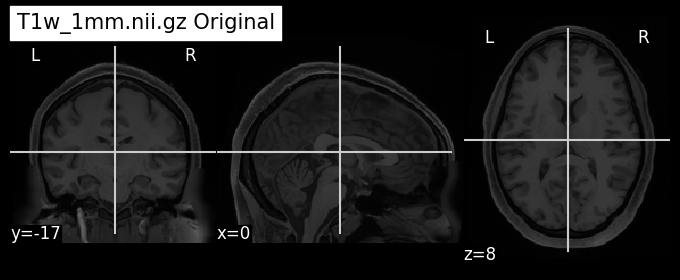

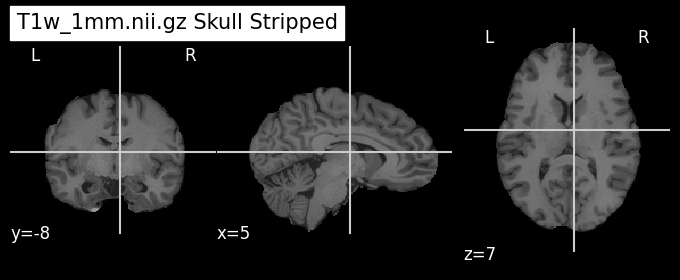

Processing ../data/input/003/ADC_deformed.nii.gz
Skull stripping completed for ../data/input/003/ADC_deformed.nii.gz


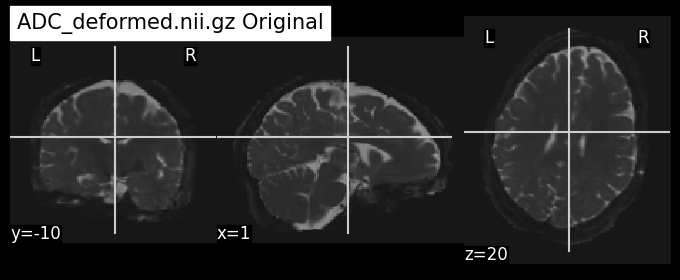

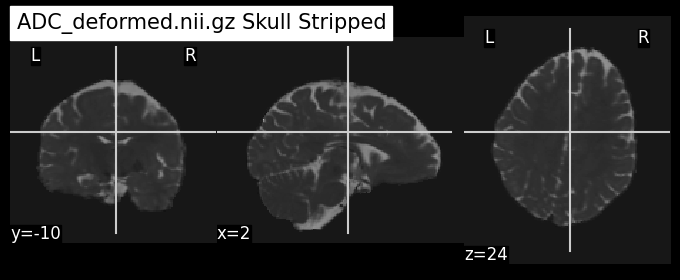

Processing ../data/input/003/T2w_1mm_noalign.nii.gz
Skull stripping completed for ../data/input/003/T2w_1mm_noalign.nii.gz


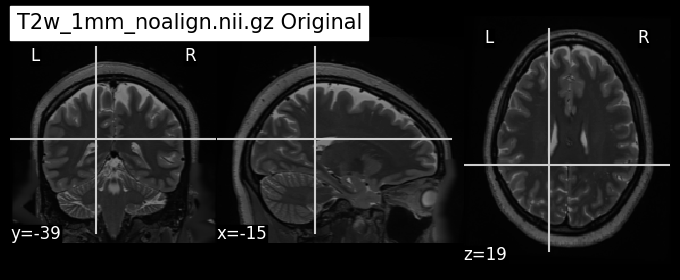

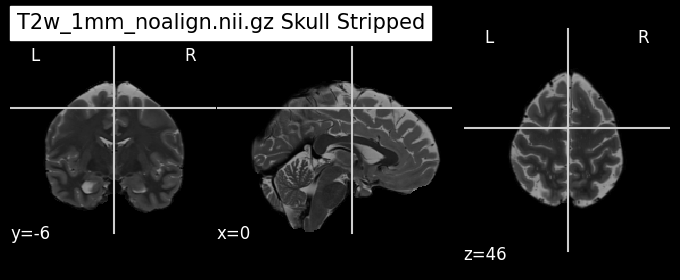

Processing ../data/input/003/FA_deformed.nii.gz
Skull stripping completed for ../data/input/003/FA_deformed.nii.gz


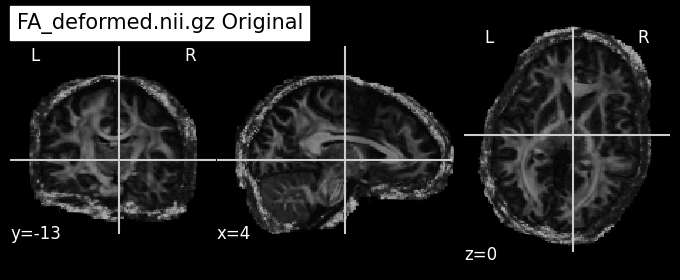

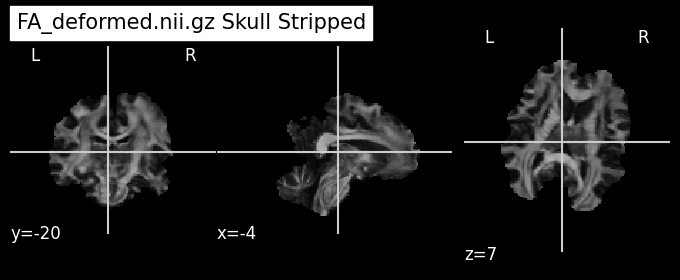

Skull stripping completed.


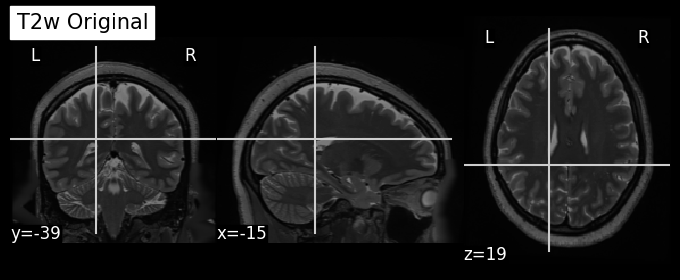

ValueError: File not found: '../data/output/003/T2w_1mm_noalign_brain.nii.gz'

In [26]:
import os
import subprocess
from nilearn import plotting

def skull_stripping(input_file, output_file, bet_frac=0.5):
    """
    Perform skull stripping using FSL's BET.
    
    Args:
        input_file (str): Path to the input NIfTI file.
        output_file (str): Path to the output NIfTI file after skull stripping.
        bet_frac (float): Fractional intensity threshold (default: 0.5).
    """
    bet_cmd = f"bet {input_file} {output_file} -f {bet_frac}"
    subprocess.run(bet_cmd, shell=True, check=True)

def display_image(image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        image_file (str): Path to the NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(image_file, title=title, display_mode='ortho')
    plotting.show()

def process_files(input_folder, output_folder):
    nifti_files = glob.glob(os.path.join(input_folder, '**/*.nii.gz'), recursive=True)

    for input_file in nifti_files:
        relative_path = os.path.relpath(input_file, input_folder)
        filename = os.path.splitext(os.path.basename(relative_path))[0]
        filename, _ = os.path.splitext(filename)  # Remove any remaining extensions
        output_file = os.path.join(output_folder, filename + '_brain.nii.gz')
        os.makedirs(os.path.dirname(output_file), exist_ok=True)

        print(f"Processing {input_file}")
        skull_stripping(input_file, output_file)
        print(f"Skull stripping completed for {input_file}")

        display_image(input_file, f"{os.path.basename(input_file)} Original")
        display_image(output_file, f"{os.path.basename(input_file)} Skull Stripped")

if __name__ == "__main__":
    # Define input and output file paths
    root_dir = os.path.join('..')
    input_dir = os.path.join(root_dir, 'data', 'input')
    output_dir = os.path.join(root_dir, 'data', 'output')
    
    # Recursively search for NIfTI files in input directory and perform skull stripping on them
    process_files(input_dir, output_dir)
    
    print("Skull stripping completed.")
    
    # Display original and skull-stripped images
    for root, dirs, files in os.walk(output_dir):
        for filename in files:
            if filename.endswith('_brain.nii.gz'):
                input_path = os.path.join(root, filename.replace('_brain.nii.gz', '.nii.gz'))
                output_path = os.path.join(root, filename)
                display_image(input_path, f"{os.path.basename(input_path)} Original")
                display_image(output_path, f"{os.path.basename(input_path)} Skull Stripped")
